#### Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset

In [2]:
df = pd.read_csv('Air_Traffic_Landings_Statistics.csv')
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


In [3]:
df["Aircraft Version"].replace('-', np.nan, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26842 entries, 0 to 26841
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              26842 non-null  int64 
 1   Operating Airline            26842 non-null  object
 2   Operating Airline IATA Code  26738 non-null  object
 3   Published Airline            26842 non-null  object
 4   Published Airline IATA Code  26738 non-null  object
 5   GEO Summary                  26842 non-null  object
 6   GEO Region                   26842 non-null  object
 7   Landing Aircraft Type        26842 non-null  object
 8   Aircraft Body Type           26842 non-null  object
 9   Aircraft Manufacturer        26825 non-null  object
 10  Aircraft Model               26842 non-null  object
 11  Aircraft Version             13952 non-null  object
 12  Landing Count                26842 non-null  int64 
 13  Total Landed Weight          26

In [5]:
df.isnull().sum().reset_index(name = "Null values").set_index("index")

,Null values
index,
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,104
Published Airline,0
Published Airline IATA Code,104
GEO Summary,0
GEO Region,0
Landing Aircraft Type,0
Aircraft Body Type,0


In [6]:
print("No. of aircaft versions provided is {}.".format(df["Aircraft Version"].nunique()))

No. of aircaft versions provided is 89.


In [7]:
df["Aircraft Version"].value_counts().rename_axis("Aircraft Version").reset_index(name = "count").set_index("Aircraft Version").head()

,count
Aircraft Version,
400,1663
300,1383
800,1151
200,1048
700,1028


In [8]:
df["Activity Period"] = pd.to_datetime(df["Activity Period"], format = "%Y%m")

df["Year"] =df["Activity Period"].dt.year

print("This dataset covers the years from", df["Year"].min(),"to {}.".format(df["Year"].max()))

This dataset covers the years from 2005 to 2021.


In [9]:
df.drop(["Operating Airline IATA Code", "Published Airline IATA Code"], axis = 1, inplace = True)

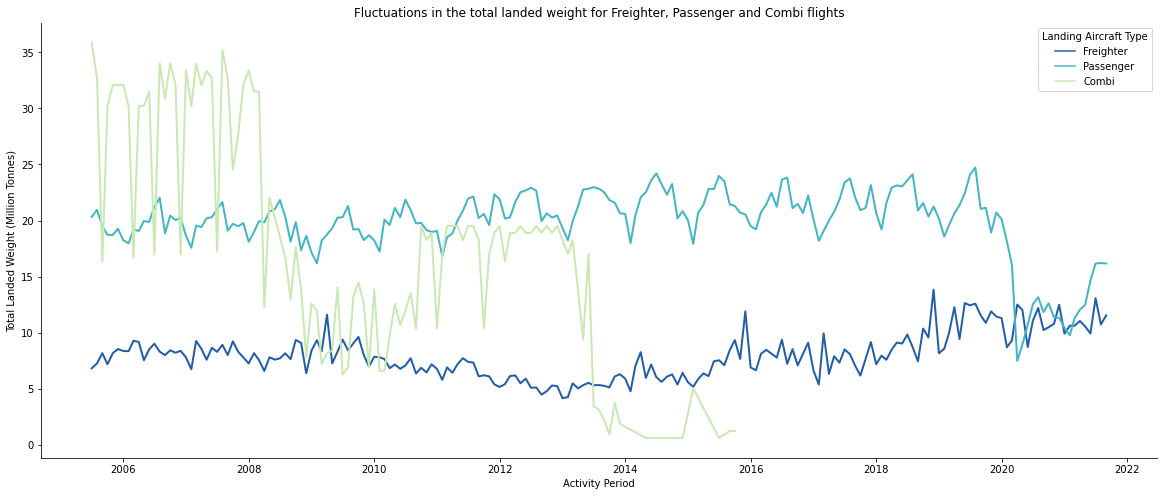

In [11]:
# establish new total landed weight variable with units adjusted
df["Total Landed Weight (Million Tonnes)"] = df["Total Landed Weight"]/1000000

#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = df, 
             hue ="Landing Aircraft Type", ci = None, palette = "YlGnBu_r", lw=2)

# modify graph
plt.title("Fluctuations in the total landed weight for Freighter, Passenger and Combi flights")
sns.despine(top = True, right = True, left = False, bottom = False)

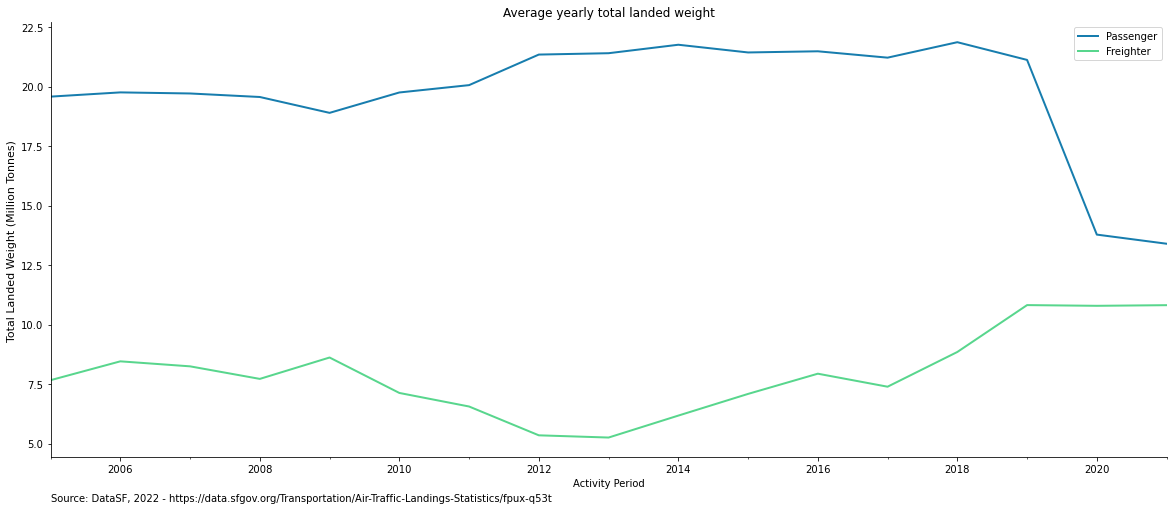

In [12]:
#create copy of dataset
df_1 = df.copy()

#revise shape of dataset to enable resampling based on time
df_1P = df_1[df_1["Landing Aircraft Type"]== "Passenger"][["Activity Period","Total Landed Weight (Million Tonnes)"]]
df_1F = df_1[df_1["Landing Aircraft Type"]== "Freighter"][["Activity Period","Total Landed Weight (Million Tonnes)"]]

df_1P.set_index("Activity Period", inplace = True)
df_1F.set_index("Activity Period", inplace = True)


#create graph
plt.figure(figsize = (20,8))
df_1P["Total Landed Weight (Million Tonnes)"].resample(rule="A").mean().plot.line(label = "Passenger", color =  "#177DAE", lw=2).legend(loc='upper right')

df_1F["Total Landed Weight (Million Tonnes)"].resample(rule="A").mean().plot(label = "Freighter", color = "#58D68D",lw=2).legend(loc='upper right')


#modified graph
plt.title("Average yearly total landed weight")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.ylabel("Total Landed Weight (Million Tonnes)", fontsize=11)

plt.show()

In [13]:
df_1PM = df_1P["Total Landed Weight (Million Tonnes)"].resample(rule="M").mean().reset_index(name = "Avg Weight").set_index("Activity Period")
df_1FM = df_1F["Total Landed Weight (Million Tonnes)"].resample(rule="M").mean().reset_index(name = "Avg Weight").set_index("Activity Period")

df_1PM["3ms moving avg"] = df_1PM["Avg Weight"].rolling(window=3).mean()
df_1FM["3ms moving avg"] = df_1FM["Avg Weight"].rolling(window=3).mean()

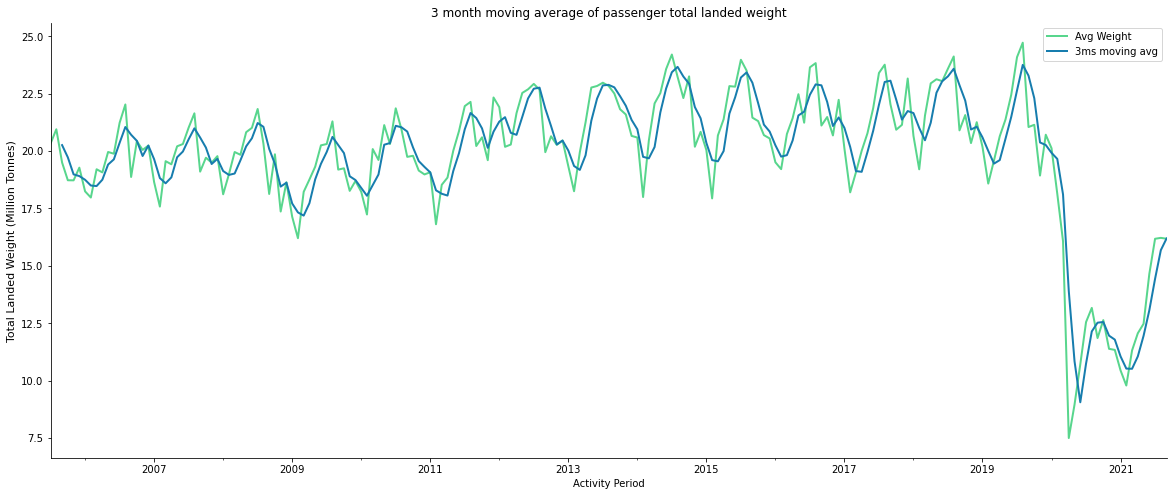

In [14]:
#create graph
df_1PM[["Avg Weight","3ms moving avg"]].plot.line(figsize = (20,8), color = ["#58D68D", "#177DAE"],
                                                  title = "3 month moving average of passenger total landed weight", 
                                                  lw=2).legend(loc='upper right');

#modified graph
sns.despine(top = True, right = True, left = False, bottom = False)
# plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.ylabel("Total Landed Weight (Million Tonnes)", fontsize=11)

plt.show()

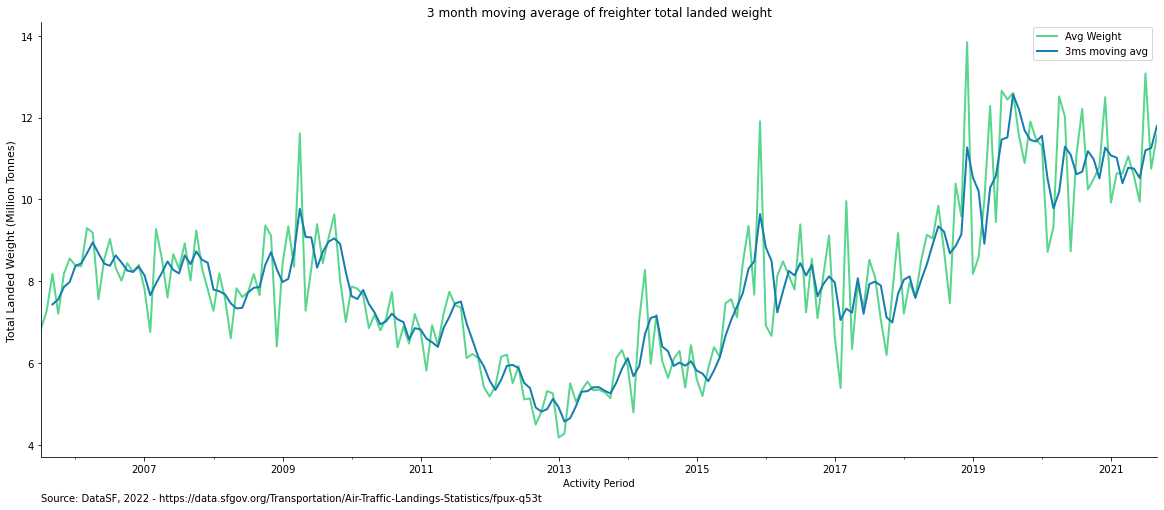

In [15]:
#create graph
df_1FM[["Avg Weight","3ms moving avg"]].plot.line(figsize = (20,8), title = "3 month moving average of freighter total landed weight", 
                                                  color = ["#58D68D", "#177DAE"], lw=2).legend(loc='upper right');

#modified graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.ylabel("Total Landed Weight (Million Tonnes)", fontsize=11)

plt.show()

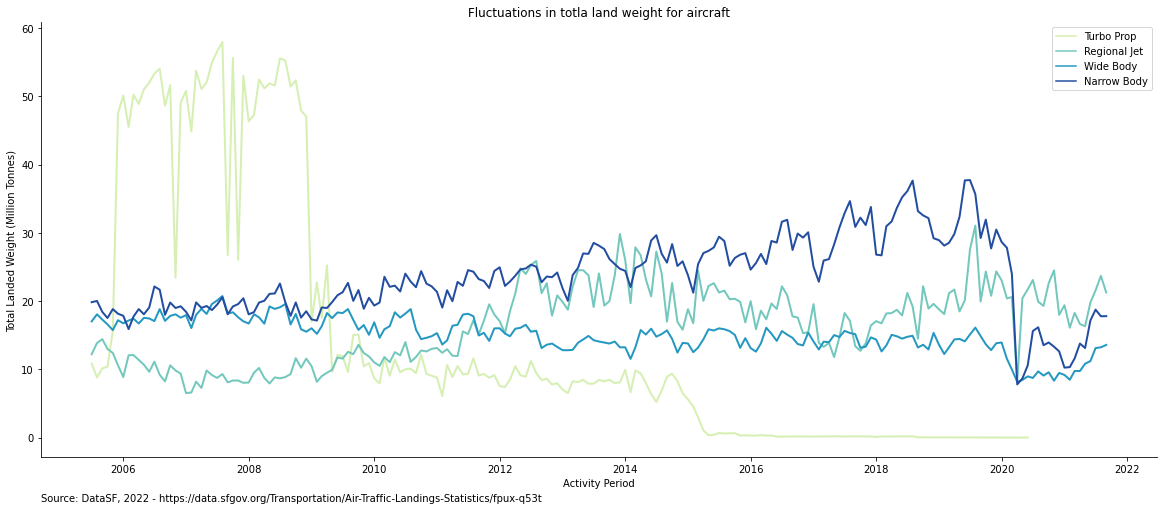

In [16]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = df, hue ="Aircraft Body Type", ci = None,
             palette = "YlGnBu",  hue_order = ["Turbo Prop", "Regional Jet",  "Wide Body", "Narrow Body"], lw=2 )

#modified graph
plt.title("Fluctuations in totla land weight for aircraft")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.legend(loc='upper right')
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

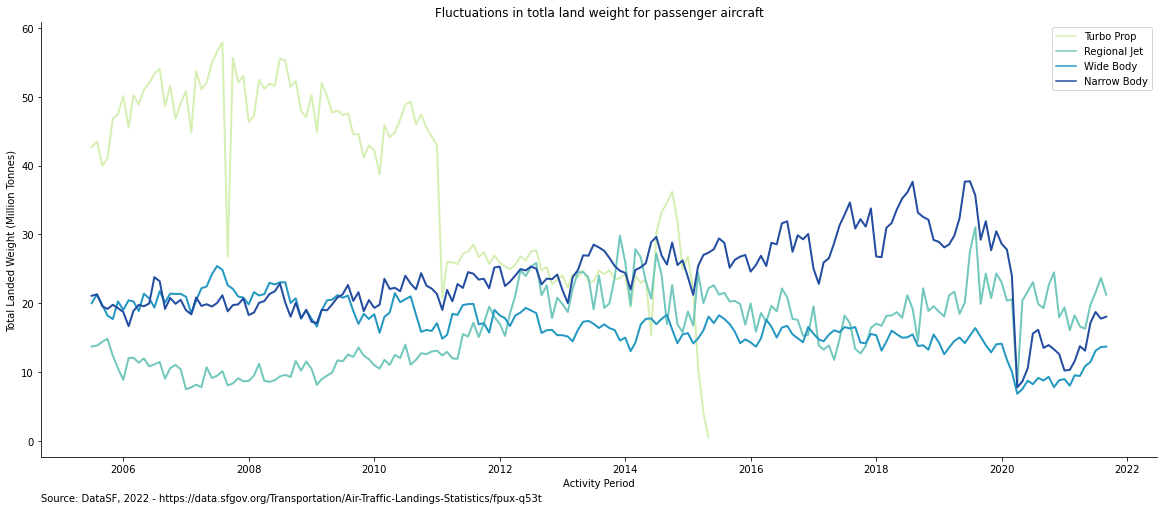

In [17]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = df[df["Landing Aircraft Type"]=="Passenger"], hue ="Aircraft Body Type", 
             ci = None, palette = "YlGnBu",  hue_order = ["Turbo Prop", "Regional Jet",  "Wide Body", "Narrow Body",], lw=2 )

#modified graph
plt.title("Fluctuations in totla land weight for passenger aircraft")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.legend(loc='upper right')
plt.show()

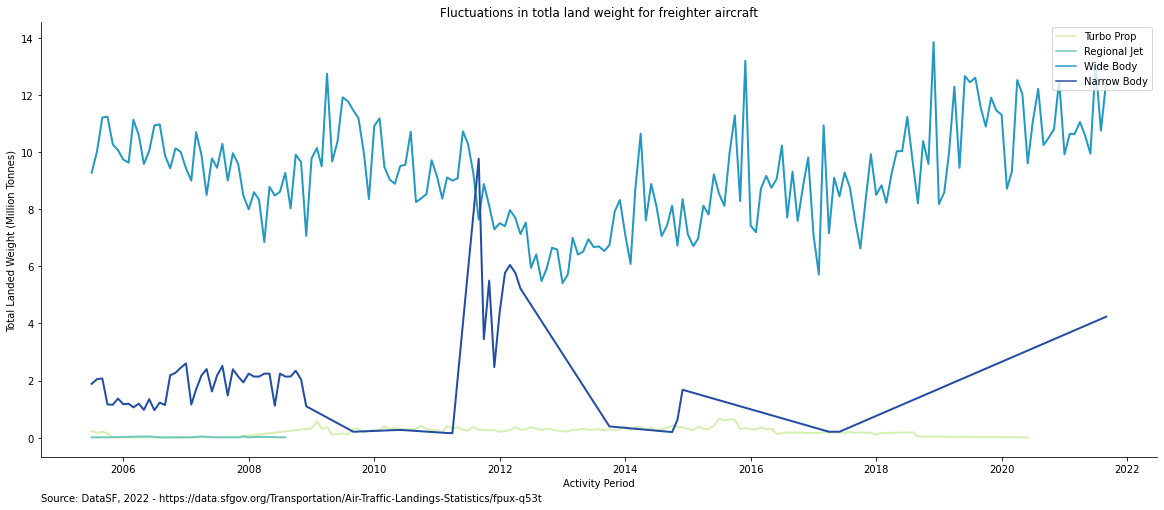

In [18]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = df[df["Landing Aircraft Type"]=="Freighter"], 
             hue ="Aircraft Body Type", ci = None, palette = "YlGnBu",  hue_order = ["Turbo Prop", "Regional Jet",  "Wide Body", "Narrow Body",], lw=2)

#modified graph
plt.title("Fluctuations in totla land weight for freighter aircraft")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.legend(loc='upper right')
plt.show()

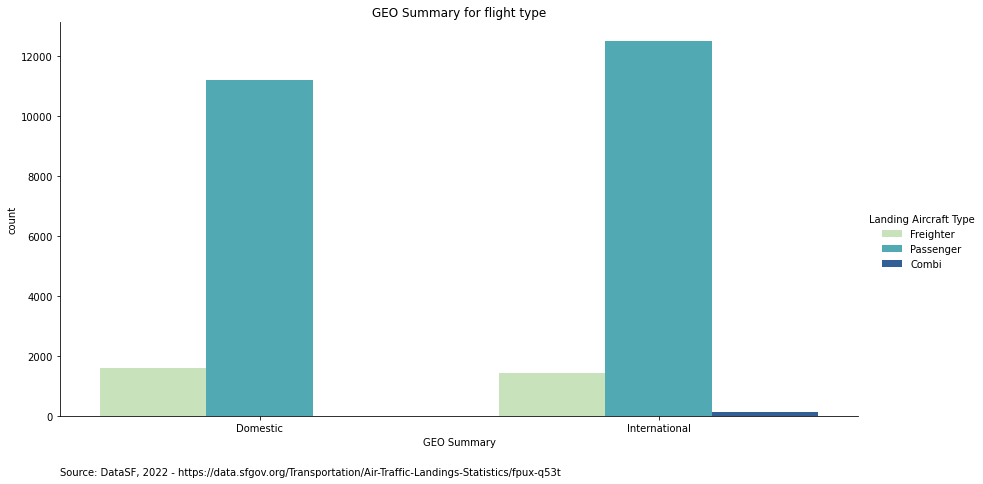

In [19]:
#create graph
sns.catplot(x = "GEO Summary", kind = "count", hue ="Landing Aircraft Type", data = df, 
            palette = "YlGnBu", height = 6, aspect = 2,)

#modified graph
plt.title("GEO Summary for flight type");
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.15), xycoords ='axes fraction' )

plt.show()

In [20]:
df["Landing Aircraft Type"].value_counts()

Passenger    23690
Freighter     3010
Combi          142
Name: Landing Aircraft Type, dtype: int64

In [21]:
Passenger = df[df["Landing Aircraft Type"]=="Passenger"]

print("There are",Passenger["Published Airline"].nunique(),"published airlines operating for passenger flights")


There are 85 published airlines operating for passenger flights


In [22]:
Passenger["Published Airline"].value_counts().reset_index(name = "count").describe()

,count
count,85.000000
mean,278.705882
std,609.941641
min,1.000000
25%,18.000000
50%,98.000000
75%,287.000000
max,4348.000000


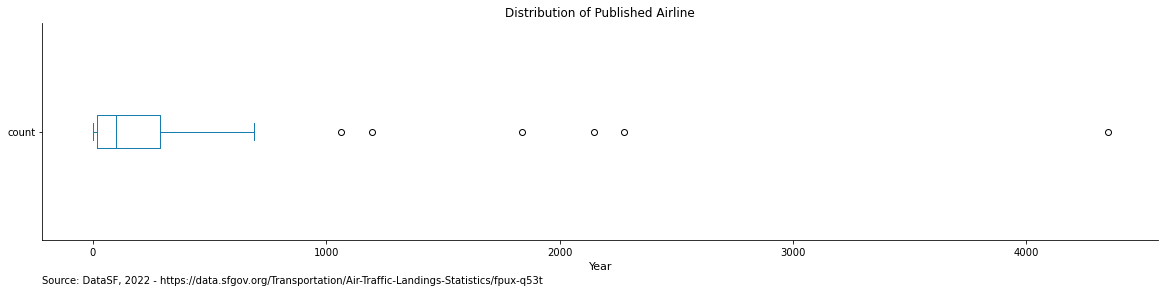

In [23]:
#create graph
Passenger["Published Airline"].value_counts().reset_index(name = "count").plot.box(figsize = (20,4), 
                                                                                   vert=False, 
                                                                                   title = "Distribution of Published Airline", color = "#177DAE")

#modified graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.20), xycoords ='axes fraction' )
plt.xlabel("Year", fontsize=11)
plt.show()

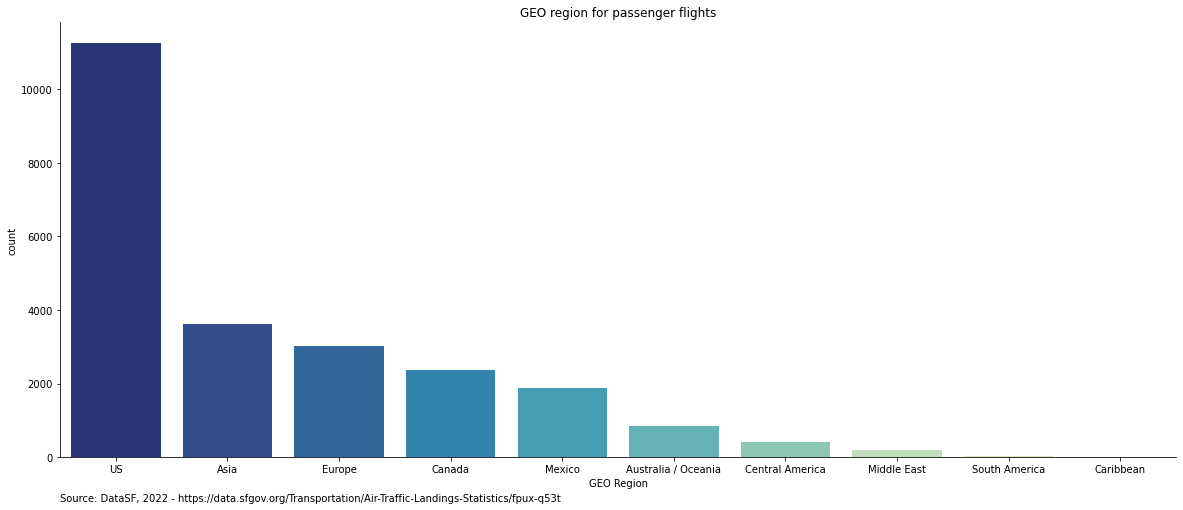

In [24]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region",  data = Passenger, palette = "YlGnBu_r", order =Passenger["GEO Region"].value_counts().index )

#modified graph
plt.title("GEO region for passenger flights")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

d:\Anaconda_Inc\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


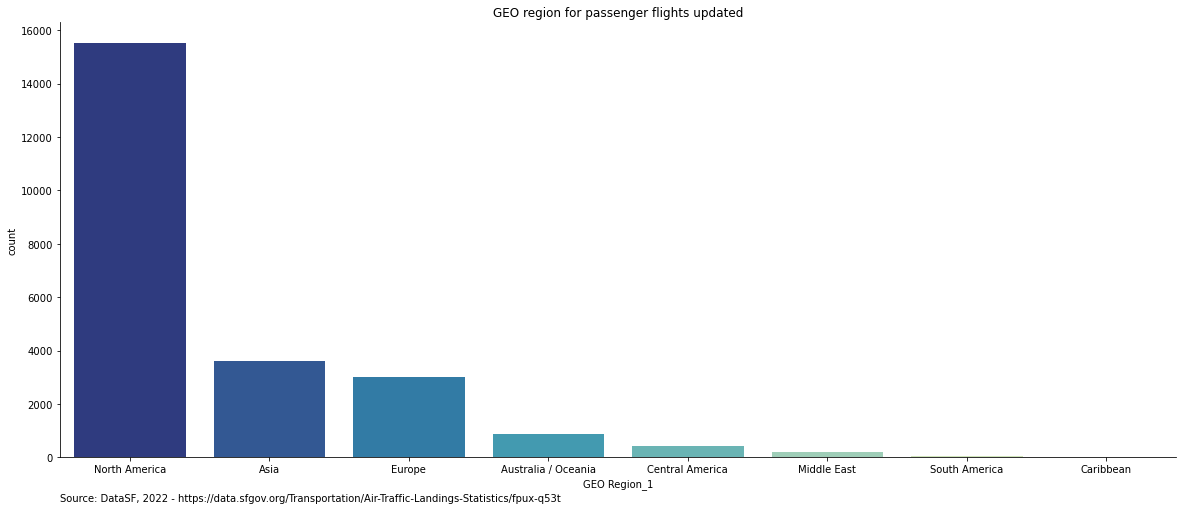

In [25]:
# establish new variable
Passenger["GEO Region_1"] = Passenger["GEO Region"].replace(["Canada", "Mexico", "US"], "North America", )

#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region_1",  data = Passenger, palette = "YlGnBu_r", order =Passenger["GEO Region_1"].value_counts().index )

#modified graph
plt.title("GEO region for passenger flights updated")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

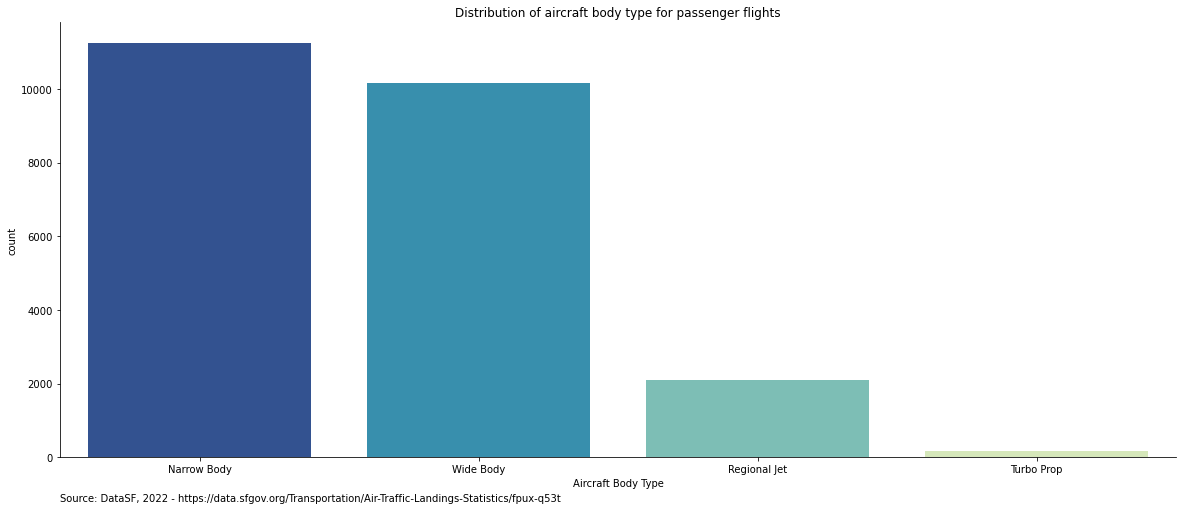

In [26]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Body Type", data = Passenger, palette = "YlGnBu_r")

#modified graph
plt.title("Distribution of aircraft body type for passenger flights")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

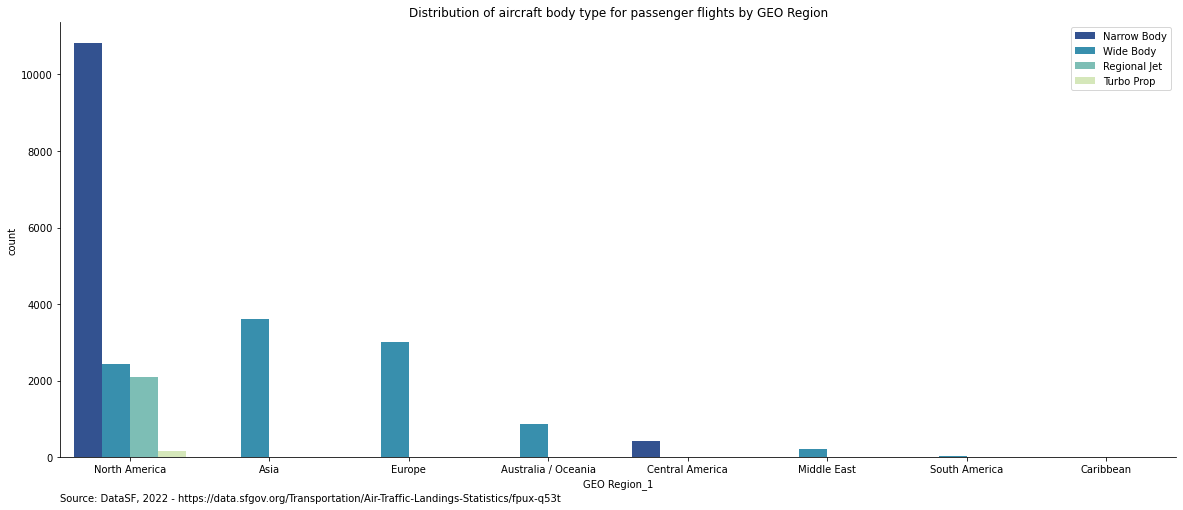

In [27]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region_1", hue = "Aircraft Body Type", data = Passenger, palette = "YlGnBu_r", hue_order =["Narrow Body", "Wide Body", "Regional Jet", "Turbo Prop"])

#modified graph
plt.title("Distribution of aircraft body type for passenger flights by GEO Region")
plt.legend(loc='upper right')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

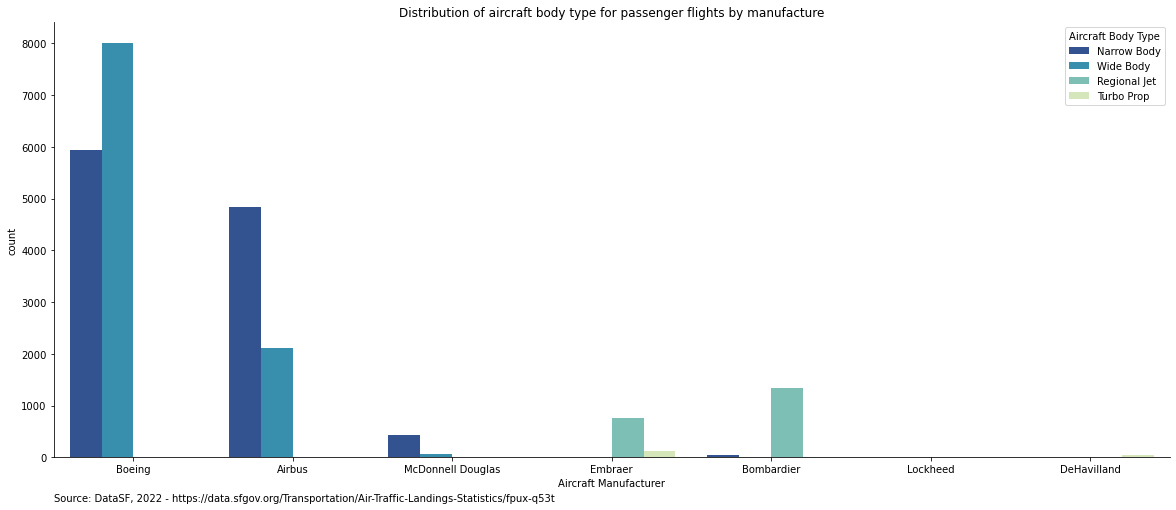

In [28]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Manufacturer", hue = "Aircraft Body Type", 
              data = Passenger, palette = "YlGnBu_r", hue_order =["Narrow Body", "Wide Body", "Regional Jet", "Turbo Prop"])

#modified graph
plt.title("Distribution of aircraft body type for passenger flights by manufacture")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

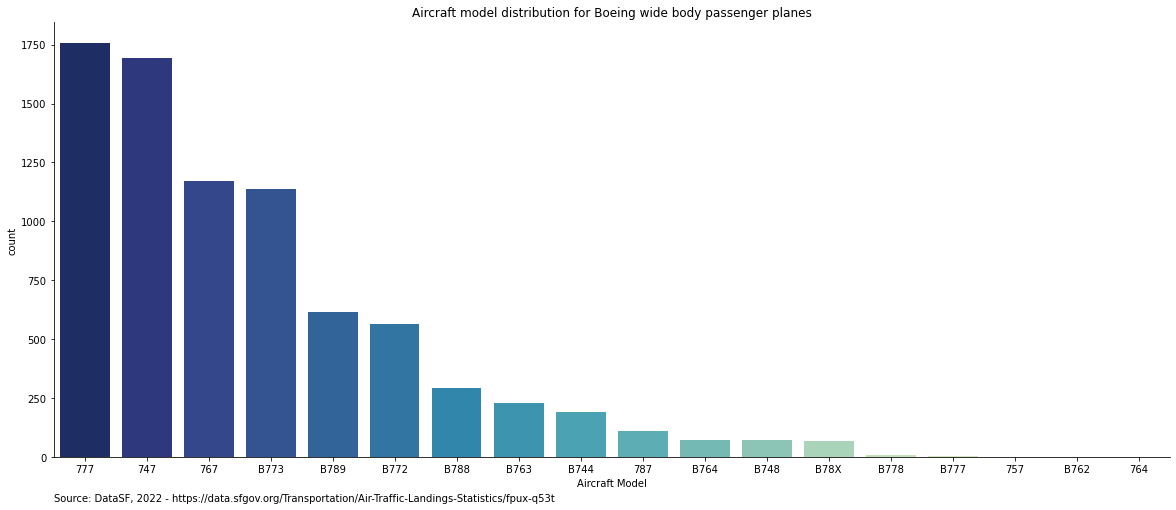

In [29]:
# establish new variables for narrow and wide body passenger planes
Passenger_Boeing_Wide = Passenger[(Passenger["Aircraft Manufacturer"]=="Boeing") &(Passenger["Aircraft Body Type"]=="Wide Body")]
Passenger_Airbus_Narrow = Passenger[(Passenger["Aircraft Manufacturer"]=="Airbus") &(Passenger["Aircraft Body Type"]=="Narrow Body")]

#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Model", data = Passenger_Boeing_Wide, order =Passenger_Boeing_Wide["Aircraft Model"].value_counts().index , palette = "YlGnBu_r")

#modified graph
plt.title("Aircraft model distribution for Boeing wide body passenger planes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

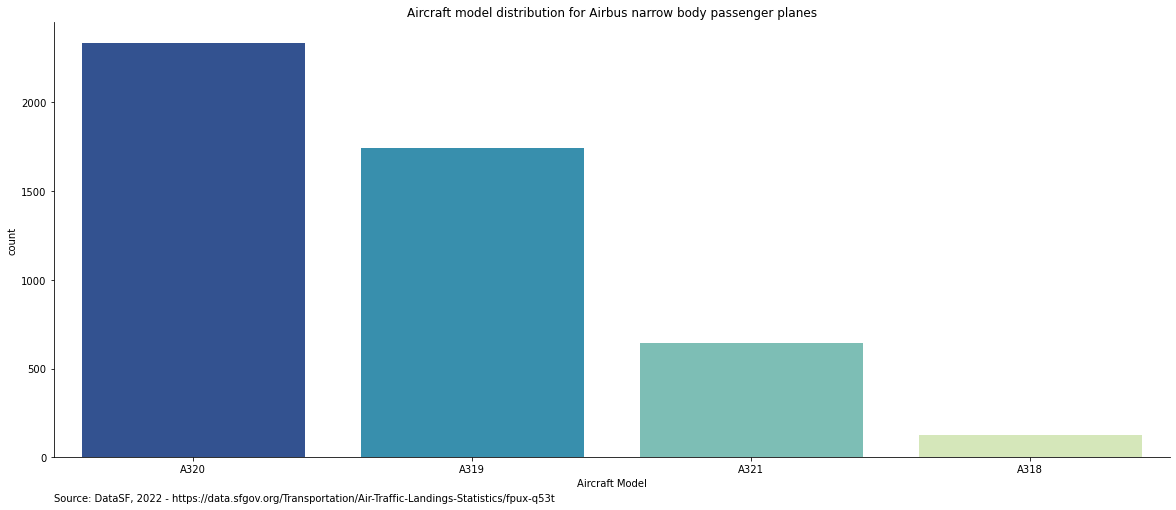

In [30]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Model", data = Passenger_Airbus_Narrow, order =Passenger_Airbus_Narrow["Aircraft Model"].value_counts().index, palette = "YlGnBu_r" )

#modified graph
plt.title("Aircraft model distribution for Airbus narrow body passenger planes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

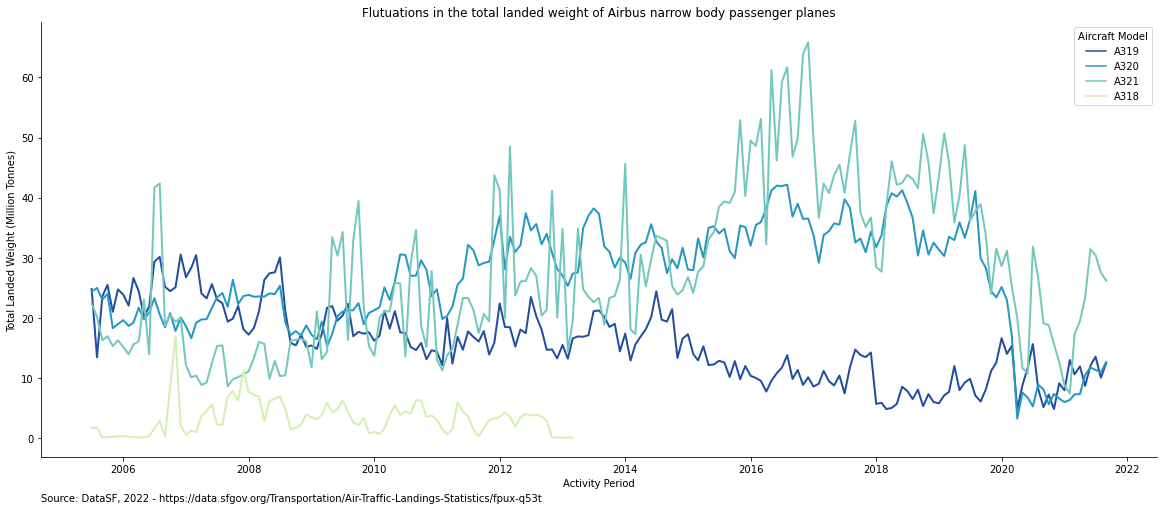

In [31]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", 
             hue = "Aircraft Model", data = Passenger_Airbus_Narrow , ci = None, palette = "YlGnBu_r", lw=2)

#modified graph
plt.title("Flutuations in the total landed weight of Airbus narrow body passenger planes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

In [32]:
A320 = Passenger_Airbus_Narrow[Passenger_Airbus_Narrow["Aircraft Model"]== "A320"][["Activity Period","Total Landed Weight (Million Tonnes)" ]]
A321 = Passenger_Airbus_Narrow[Passenger_Airbus_Narrow["Aircraft Model"]== "A321"][["Activity Period","Total Landed Weight (Million Tonnes)" ]]

A320.set_index("Activity Period", inplace = True)
A321.set_index("Activity Period", inplace = True)

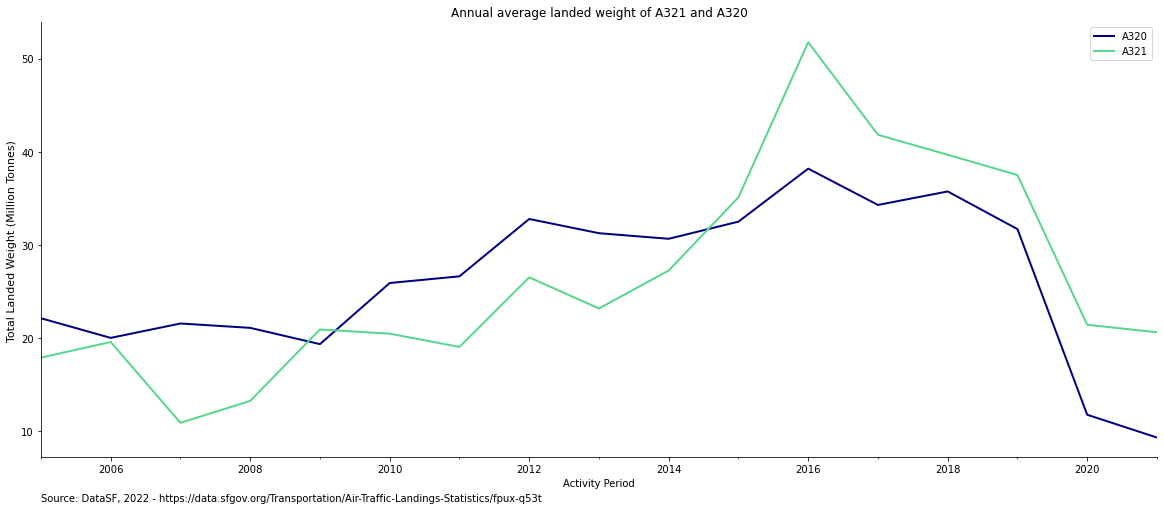

In [33]:
#create graph
A320["Total Landed Weight (Million Tonnes)"].resample(rule="A").mean().plot(label = "A320", figsize = (20,8), color = "navy", lw=2).legend()

A321["Total Landed Weight (Million Tonnes)"].resample(rule="A").mean().plot(label = "A321",lw=2,
                                                                            color = "#58D68D", title = "Annual average landed weight of A321 and A320").legend()

#modified graph
plt.legend(loc='upper right')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.ylabel("Total Landed Weight (Million Tonnes)", fontsize=11)
plt.show()

In [34]:
Freighter = df[df["Landing Aircraft Type"]=="Freighter"]

d:\Anaconda_Inc\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


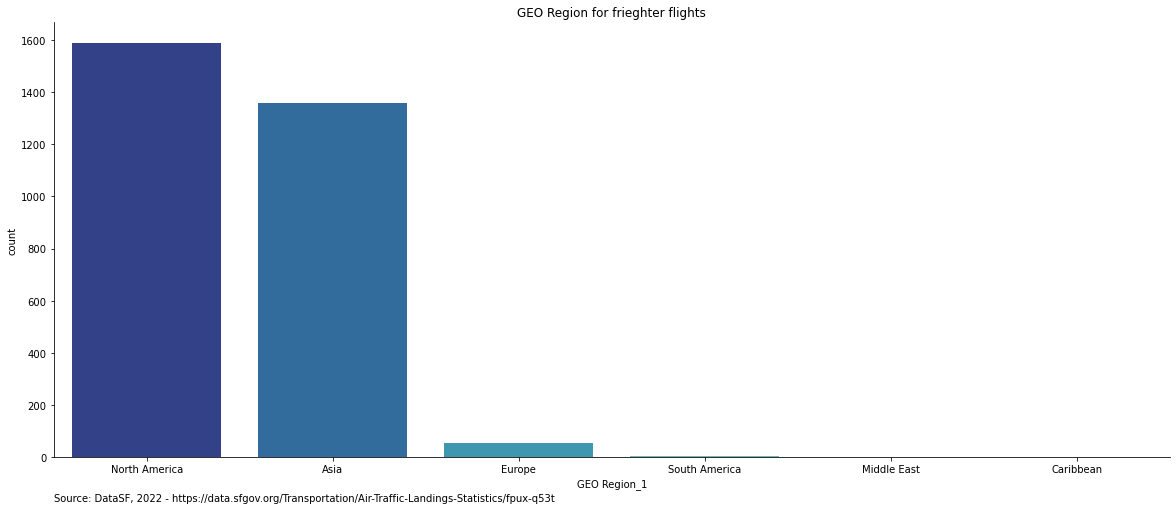

In [35]:
# new variable with US, Canada and Mexico merged
Freighter["GEO Region_1"] = Freighter["GEO Region"].replace(["Canada", "Mexico", "US"], "North America", )

#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region_1",  data = Freighter, palette = "YlGnBu_r", order =Freighter["GEO Region_1"].value_counts().index )

#modified graph
plt.title("GEO Region for frieghter flights")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

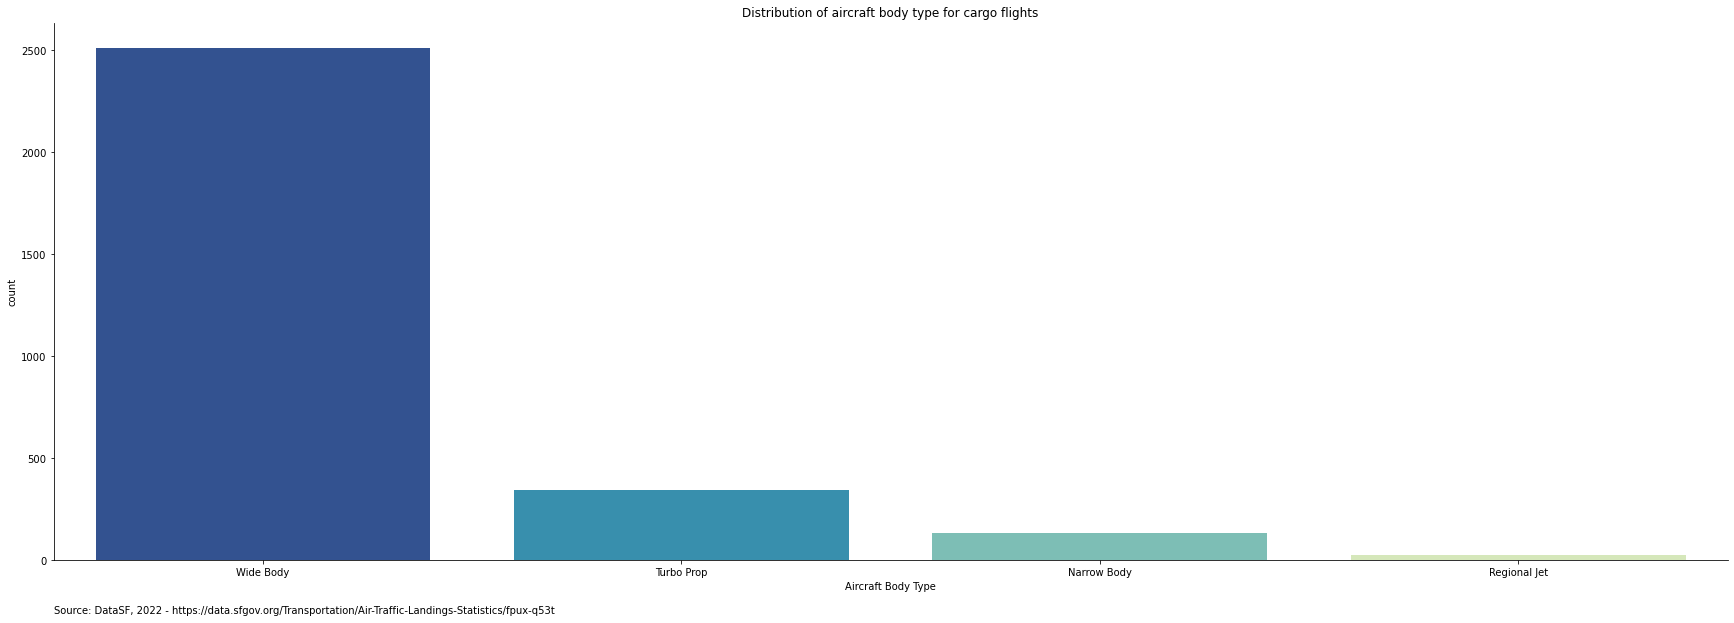

In [36]:
#create graph
sns.catplot(x ="Aircraft Body Type" , data = Freighter, kind = "count", height = 8, aspect=3, palette = "YlGnBu_r", 
            order =Freighter["Aircraft Body Type"].value_counts().index );

#modified graph
plt.title("Distribution of aircraft body type for cargo flights")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

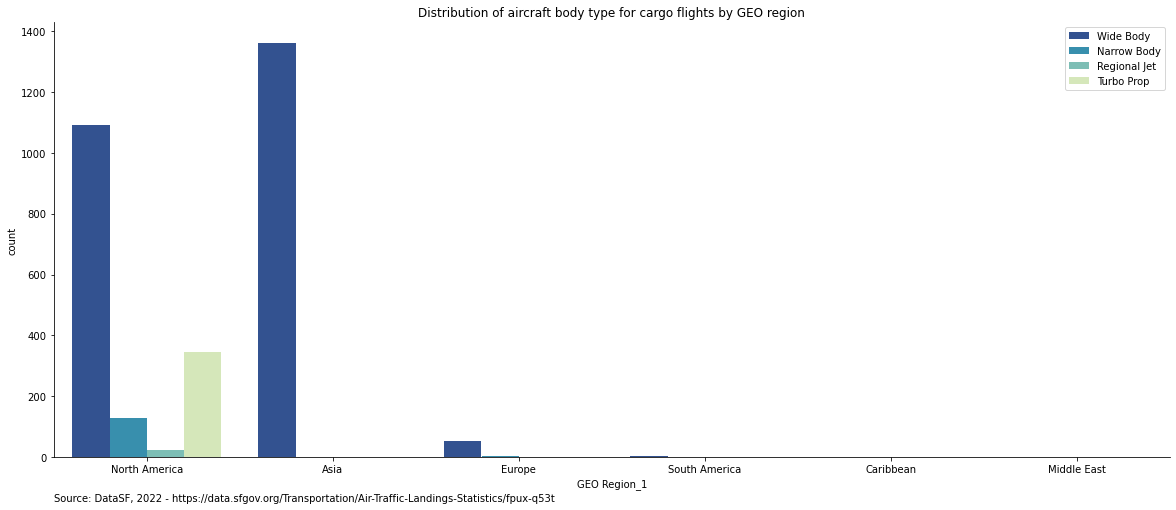

In [37]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region_1", hue = "Aircraft Body Type", data = Freighter, 
              palette = "YlGnBu_r", hue_order = ["Wide Body", "Narrow Body", "Regional Jet", "Turbo Prop"])

#modified graph
plt.title("Distribution of aircraft body type for cargo flights by GEO region")
plt.legend(loc='upper right')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

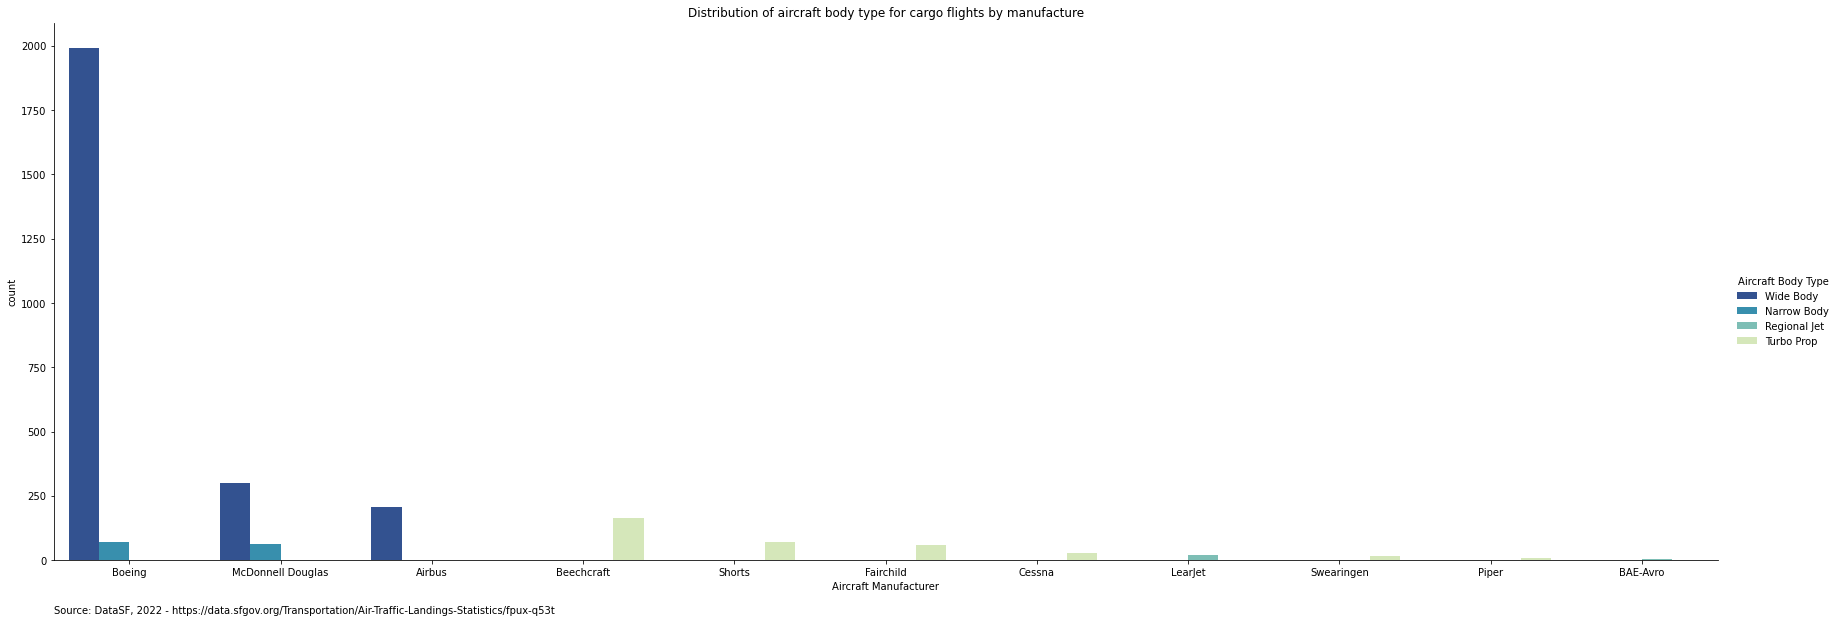

In [38]:
#create graph
sns.catplot(x ="Aircraft Manufacturer", hue="Aircraft Body Type",data = Freighter, kind = "count", height = 8, aspect=3, palette = "YlGnBu_r",
           order =Freighter["Aircraft Manufacturer"].value_counts().index, hue_order = ["Wide Body", "Narrow Body", "Regional Jet", "Turbo Prop"]);

#modified graph
plt.title("Distribution of aircraft body type for cargo flights by manufacture")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

In [39]:
Freight_Boeing_Wide = Freighter[(Freighter["Aircraft Manufacturer"]=="Boeing")& (Freighter["Aircraft Body Type"]=="Wide Body")]

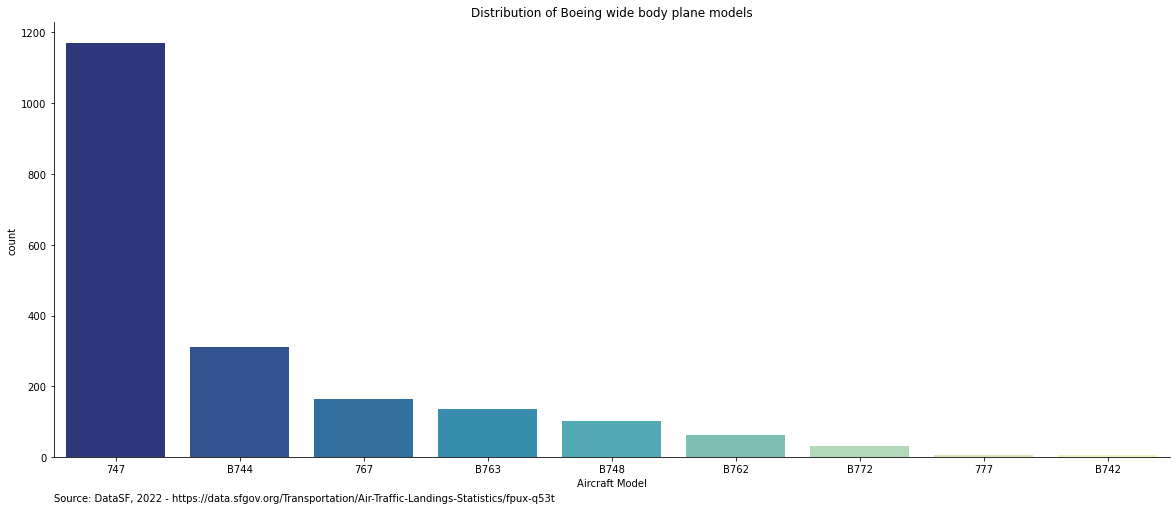

In [40]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Model", data = Freight_Boeing_Wide, order =Freight_Boeing_Wide["Aircraft Model"].value_counts().index , palette = "YlGnBu_r")

#modified graph
plt.title("Distribution of Boeing wide body plane models")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

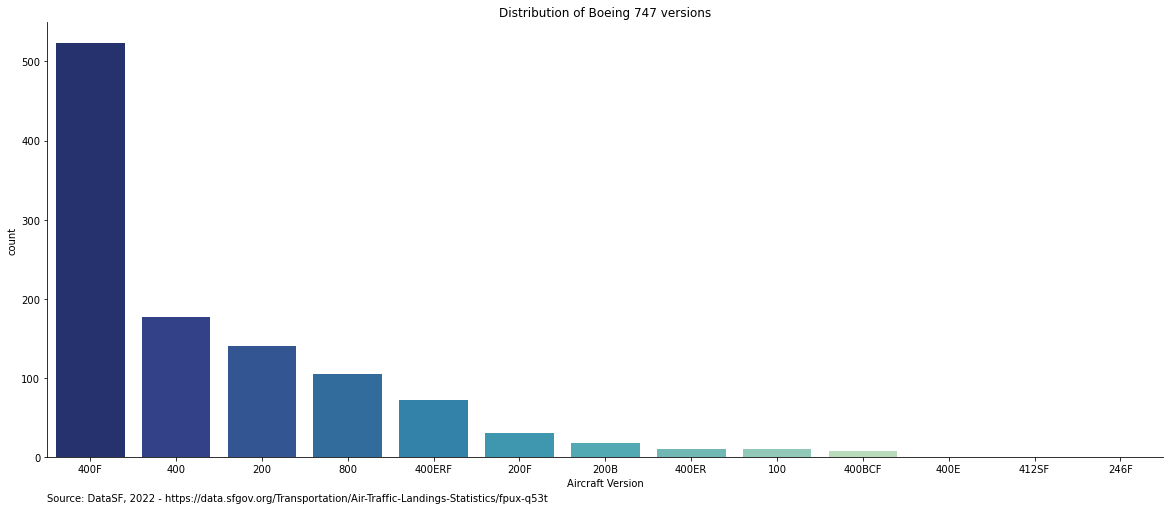

In [41]:
#create graph
plt.figure(figsize = (20,8))

sns.countplot(x ='Aircraft Version',  data = Freight_Boeing_Wide[Freight_Boeing_Wide["Aircraft Model"]=="747"], 
              order =Freight_Boeing_Wide[Freight_Boeing_Wide["Aircraft Model"]=="747"]['Aircraft Version'].value_counts().index, 
             palette = "YlGnBu_r")

#modified graph
plt.title("Distribution of Boeing 747 versions")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

In [42]:
Boeing_747_400F = Freight_Boeing_Wide[(Freight_Boeing_Wide['Aircraft Model']=="747")]

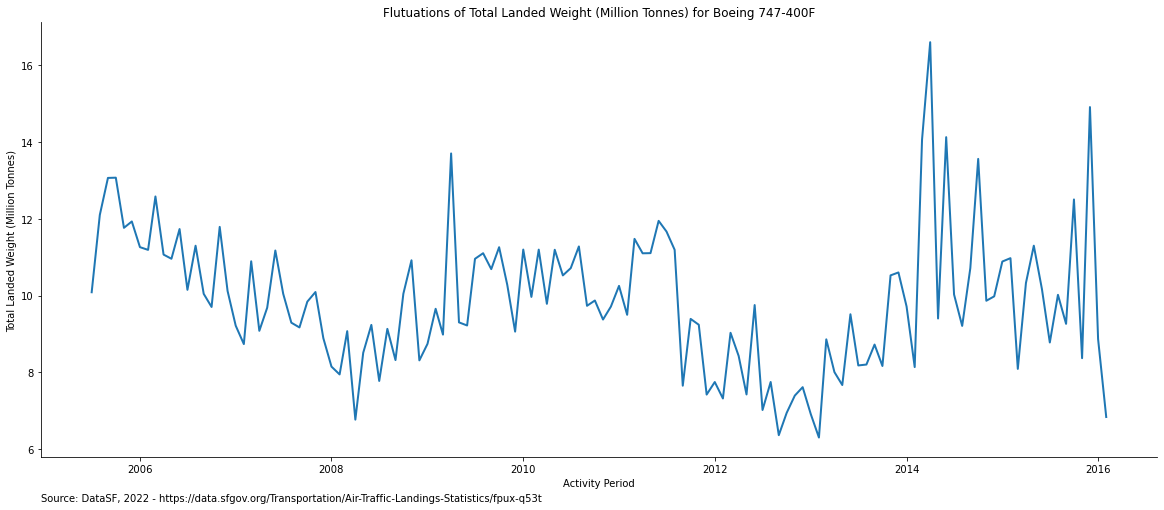

In [43]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = Boeing_747_400F,
             ci = None, palette = "YlGnBu_r", lw=2)


#modified graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Flutuations of Total Landed Weight (Million Tonnes) for Boeing 747-400F")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

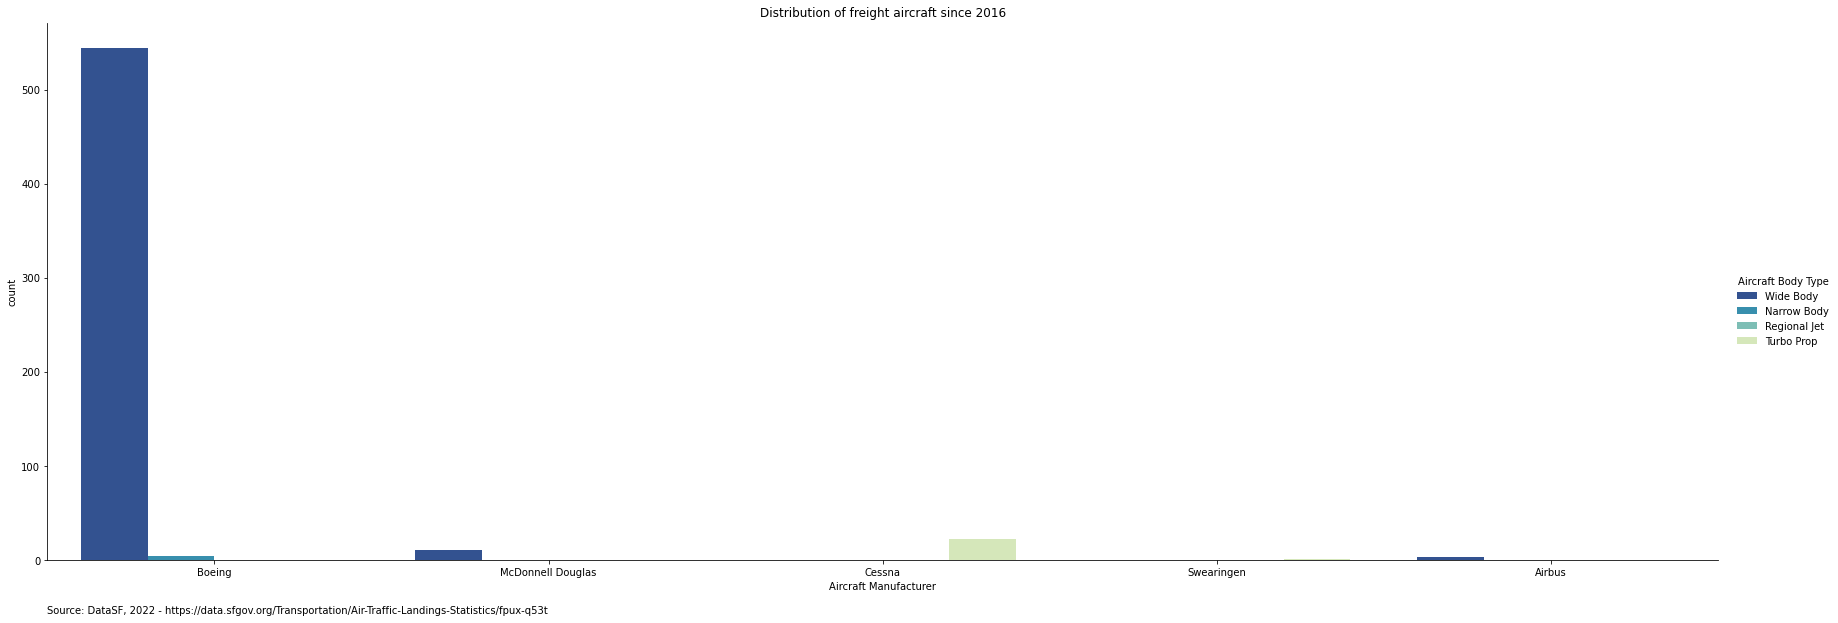

In [44]:
Freighter_2016 = Freighter[Freighter["Year"]>2016]

#create graph
sns.catplot(x ="Aircraft Manufacturer", hue="Aircraft Body Type",data = Freighter_2016, kind = "count", hue_order = ["Wide Body", "Narrow Body", "Regional Jet", "Turbo Prop"],
            height = 8, aspect=3, palette = "YlGnBu_r");

#modify graph
plt.title("Distribution of freight aircraft since 2016")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

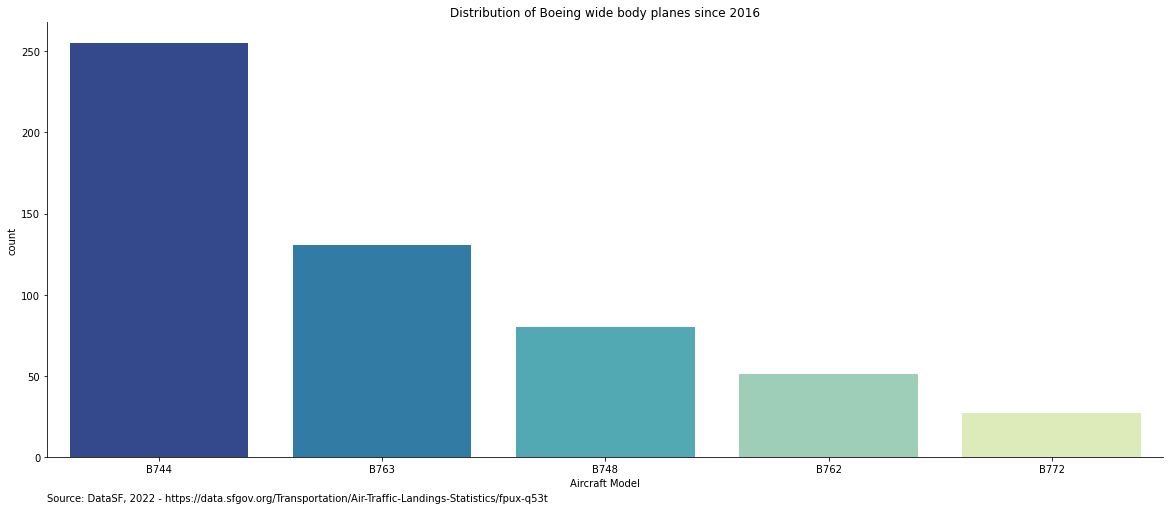

In [45]:
Freight_Boeing_Wide_2016 = Freighter_2016[(Freighter_2016["Aircraft Manufacturer"]=="Boeing")& (Freighter_2016["Aircraft Body Type"]=="Wide Body")]

#create graph
plt.figure(figsize = (20,8))

sns.countplot(x = "Aircraft Model", data = Freight_Boeing_Wide_2016, order =Freight_Boeing_Wide_2016["Aircraft Model"].value_counts().index, 
             palette = "YlGnBu_r")

#modify graph
plt.title("Distribution of Boeing wide body planes since 2016")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

In [46]:
Freight_Boeing_Wide_2016[Freight_Boeing_Wide_2016["Aircraft Model"]=="B744"]["Aircraft Version"].unique()

array([nan], dtype=object)

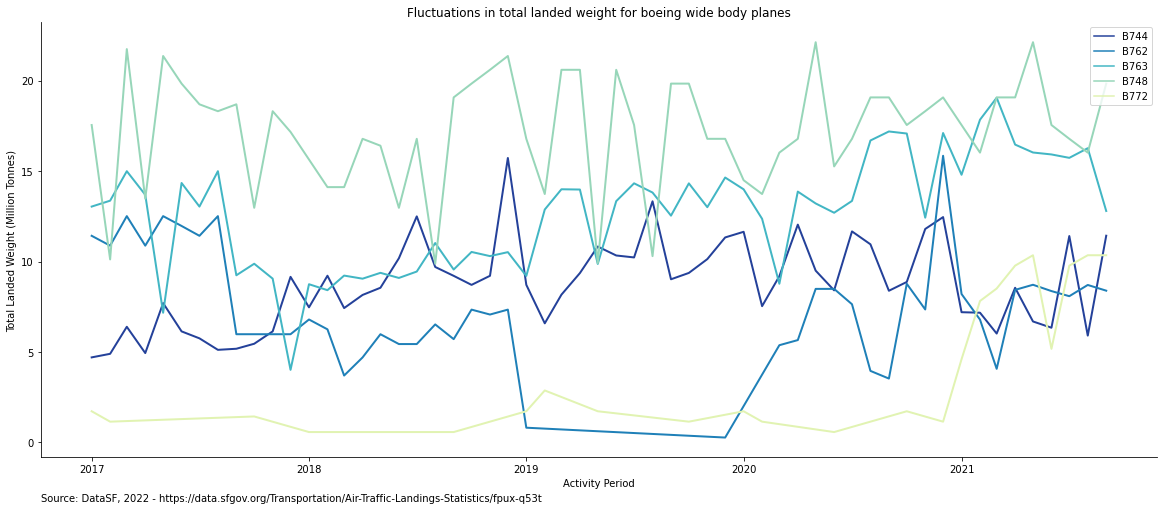

In [47]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)",
             hue = "Aircraft Model", data = Freight_Boeing_Wide_2016 , ci = None, palette = "YlGnBu_r", lw=2)

#modify graph
plt.legend(loc='upper right')
plt.title("Fluctuations in total landed weight for boeing wide body planes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Conclusion
It should be stated that the observations made in this project are focused on SFO. Therefore, some of the observations made may differ from airport to airport. That being said, based on this dataset, it is apparent that Airbus dominate the aircraft servicing commercial flights with their A320 and A321. On the other hand, Boeing is a market leader for wide body plans and dominate the cargo flights.  There are also smaller manufactures who operate in the sector, however their roles are limited.

COVID had a major impact on the aviation sector as travel was put on hold and lockdowns made travel difficult. However, as vaccinations become widely used, the market appear to be recovering. 